# Q.

For Text Mining assignment
TWO:
1) Extract reviews of any product from ecommerce website like amazon Perform emotion mining

# importing  important libraries

In [1]:
import pandas as pd
import numpy as np
import string
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud


I extract the reviews of amazon product named "Bio-Oil Original Face & Body Oil Suitable for Scar Removal | Uneven Skin Tone|Stretch Marks & Ageing Signs for Glowing Skin with Vitamin A & E | All Skin Types |" from one app called 'PARSEHUB'.
WIth the help of this app i paste the link of this product and download all the reviews related information in csv. format and used to make a sentimental analysis of the same.

# Reading the file 

In [2]:
bio_oil=pd.read_csv(r"C:\Users\ABC\Desktop\desktop\Review on bio-oil natural.csv")

In [3]:
bio_oil

,NAME,RATING,LOCATION_DATE,REVIEW
0,sangeeta,4.0 out of 5 stars,Reviewed in India on 8 December 2022,"Beware of fake product guys, i have posted the..."
1,Dhimahi M.,4.0 out of 5 stars,Reviewed in India on 8 December 2022,Good product for body. Scent is excellent but ...
2,Anita Pathak,4.0 out of 5 stars,Reviewed in India on 19 November 2022,Happy to buy
3,Rishitha Kaja,4.0 out of 5 stars,Reviewed in India on 31 October 2022,I use it as a face and body oil but didn't see...
4,Vishnu,4.0 out of 5 stars,Reviewed in India on 28 October 2022,Ok
...,...,...,...,...
215,Susweta Biswas,5.0 out of 5 stars,Reviewed in India on 16 January 2018,People used to tell me that my stretch marks a...
216,Amazon Customer,4.0 out of 5 stars,Reviewed in India on 24 December 2020,The oil does reduce stretch marks to some exte...
217,Saffron,4.0 out of 5 stars,Reviewed in India on 14 November 2020,Very I good product. Di t know if it works bec...
218,Mandy Bansal,4.0 out of 5 stars,Reviewed in India on 12 July 2021,Nice


In [4]:
bio_oil.drop(['NAME','RATING','LOCATION_DATE'],inplace=True,axis=1)

In [5]:
bio_oil.head()

,REVIEW
0,"Beware of fake product guys, i have posted the..."
1,Good product for body. Scent is excellent but ...
2,Happy to buy
3,I use it as a face and body oil but didn't see...
4,Ok


# EDA/TEXT PROCESSING

In [6]:
bio_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REVIEW  215 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


In [7]:
# checking null review if any

bio_oil.isna().value_counts()

REVIEW
False     215
True        5
dtype: int64

In [8]:
# dropping null values
bio_oil.dropna()

,REVIEW
0,"Beware of fake product guys, i have posted the..."
1,Good product for body. Scent is excellent but ...
2,Happy to buy
3,I use it as a face and body oil but didn't see...
4,Ok
...,...
215,People used to tell me that my stretch marks a...
216,The oil does reduce stretch marks to some exte...
217,Very I good product. Di t know if it works bec...
218,Nice


In [9]:
product=bio_oil.dropna(subset=['REVIEW'])

In [10]:
product

,REVIEW
0,"Beware of fake product guys, i have posted the..."
1,Good product for body. Scent is excellent but ...
2,Happy to buy
3,I use it as a face and body oil but didn't see...
4,Ok
...,...
215,People used to tell me that my stretch marks a...
216,The oil does reduce stretch marks to some exte...
217,Very I good product. Di t know if it works bec...
218,Nice


In [11]:
product.isna().sum()

REVIEW    0
dtype: int64

In [12]:
# strip() method is to remove the whitespace from the beginning and at the end of the string.

product=[REVIEW.strip()for REVIEW in product.REVIEW] 
product=[REVIEW for REVIEW in product if REVIEW]   
product[0:300]

['Beware of fake product guys, i have posted the pic of both fake and genuine bio oil. The light orange colour one is the original and the light pink colour bottle is the fake one.\nThis is a sensitive product which we use for our skin so be sure that the product you are using is original and beneficial.',
 "Good product for body. Scent is excellent but don't use if you have combination skin because it will start giving whiteheads/white pimples.",
 'Happy to buy',
 "I use it as a face and body oil but didn't see any results",
 'Ok',
 'Good',
 'Very good product',
 'Nice product',
 'Like',
 'good product',
 "It worked perfectly for continuous 7-8 days. My skin absorbed it fully. But after few days it felt greasy on my skin. The product is good but I think it's not good for oily skin.",
 'Value foroney',
 'Good',
 'Nice',
 'Good',
 'This is good product ..I like it 🥰🥰',
 'Nice product',
 'Nice I love it',
 'I used for 4 months but not good and no effect',
 'About delivery -\nThe product 

In [13]:
nlp=spacy.load('en_core_web_sm')

In [14]:
text= ' '.join(product)
text

'Beware of fake product guys, i have posted the pic of both fake and genuine bio oil. The light orange colour one is the original and the light pink colour bottle is the fake one.\nThis is a sensitive product which we use for our skin so be sure that the product you are using is original and beneficial. Good product for body. Scent is excellent but don\'t use if you have combination skin because it will start giving whiteheads/white pimples. Happy to buy I use it as a face and body oil but didn\'t see any results Ok Good Very good product Nice product Like good product It worked perfectly for continuous 7-8 days. My skin absorbed it fully. But after few days it felt greasy on my skin. The product is good but I think it\'s not good for oily skin. Value foroney Good Nice Good This is good product ..I like it 🥰🥰 Nice product Nice I love it I used for 4 months but not good and no effect About delivery -\nThe product was delivered before time to me and also the delivery was made perfectly. 

# REMOVE PUNCTUATION

In [15]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Beware of fake product guys i have posted the pic of both fake and genuine bio oil The light orange colour one is the original and the light pink colour bottle is the fake one\nThis is a sensitive product which we use for our skin so be sure that the product you are using is original and beneficial Good product for body Scent is excellent but dont use if you have combination skin because it will start giving whiteheadswhite pimples Happy to buy I use it as a face and body oil but didnt see any results Ok Good Very good product Nice product Like good product It worked perfectly for continuous 78 days My skin absorbed it fully But after few days it felt greasy on my skin The product is good but I think its not good for oily skin Value foroney Good Nice Good This is good product I like it 🥰🥰 Nice product Nice I love it I used for 4 months but not good and no effect About delivery \nThe product was delivered before time to me and also the delivery was made perfectly The item was intact in

# TOKENIZATION

In [16]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
text_tokens= word_tokenize(no_punc_text)
print(text_tokens[0:100])

['Beware', 'of', 'fake', 'product', 'guys', 'i', 'have', 'posted', 'the', 'pic', 'of', 'both', 'fake', 'and', 'genuine', 'bio', 'oil', 'The', 'light', 'orange', 'colour', 'one', 'is', 'the', 'original', 'and', 'the', 'light', 'pink', 'colour', 'bottle', 'is', 'the', 'fake', 'one', 'This', 'is', 'a', 'sensitive', 'product', 'which', 'we', 'use', 'for', 'our', 'skin', 'so', 'be', 'sure', 'that', 'the', 'product', 'you', 'are', 'using', 'is', 'original', 'and', 'beneficial', 'Good', 'product', 'for', 'body', 'Scent', 'is', 'excellent', 'but', 'dont', 'use', 'if', 'you', 'have', 'combination', 'skin', 'because', 'it', 'will', 'start', 'giving', 'whiteheadswhite', 'pimples', 'Happy', 'to', 'buy', 'I', 'use', 'it', 'as', 'a', 'face', 'and', 'body', 'oil', 'but', 'didnt', 'see', 'any', 'results', 'Ok', 'Good']


In [18]:
len(text_tokens)

6432

# Remove stopwords

In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords in english we have to download
sw = stopwords.words('english')
sw.append('the')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
#clean text - text without stop words
clean_tokens=[word for word in text_tokens if not word in sw ]
print (clean_tokens[0:60])

['Beware', 'fake', 'product', 'guys', 'posted', 'pic', 'fake', 'genuine', 'bio', 'oil', 'The', 'light', 'orange', 'colour', 'one', 'original', 'light', 'pink', 'colour', 'bottle', 'fake', 'one', 'This', 'sensitive', 'product', 'use', 'skin', 'sure', 'product', 'using', 'original', 'beneficial', 'Good', 'product', 'body', 'Scent', 'excellent', 'dont', 'use', 'combination', 'skin', 'start', 'giving', 'whiteheadswhite', 'pimples', 'Happy', 'buy', 'I', 'use', 'face', 'body', 'oil', 'didnt', 'see', 'results', 'Ok', 'Good', 'Very', 'good', 'product']


# NORMALIZING

In [21]:
# normalizing the text - lowecase 
normalize=[x.lower()for x in clean_tokens]
print(normalize[0:50])

['beware', 'fake', 'product', 'guys', 'posted', 'pic', 'fake', 'genuine', 'bio', 'oil', 'the', 'light', 'orange', 'colour', 'one', 'original', 'light', 'pink', 'colour', 'bottle', 'fake', 'one', 'this', 'sensitive', 'product', 'use', 'skin', 'sure', 'product', 'using', 'original', 'beneficial', 'good', 'product', 'body', 'scent', 'excellent', 'dont', 'use', 'combination', 'skin', 'start', 'giving', 'whiteheadswhite', 'pimples', 'happy', 'buy', 'i', 'use', 'face']


# STEMING

In [22]:
#Stemming
from nltk.stem import PorterStemmer 
ps= PorterStemmer()
stem = [ps.stem(word) for word in normalize]
print(stem[0:40])

['bewar', 'fake', 'product', 'guy', 'post', 'pic', 'fake', 'genuin', 'bio', 'oil', 'the', 'light', 'orang', 'colour', 'one', 'origin', 'light', 'pink', 'colour', 'bottl', 'fake', 'one', 'thi', 'sensit', 'product', 'use', 'skin', 'sure', 'product', 'use', 'origin', 'benefici', 'good', 'product', 'bodi', 'scent', 'excel', 'dont', 'use', 'combin']


In [23]:
nlp=spacy.load('en_core_web_sm')

doc=nlp(' '.join(clean_tokens))
print(doc[0:60])

Beware fake product guys posted pic fake genuine bio oil The light orange colour one original light pink colour bottle fake one This sensitive product use skin sure product using original beneficial Good product body Scent excellent dont use combination skin start giving whiteheadswhite pimples Happy buy I use face body oil didnt see results Ok Good Very


# LEMATIZATION

In [24]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])

['beware', 'fake', 'product', 'guy', 'post', 'pic', 'fake', 'genuine', 'bio', 'oil', 'the', 'light', 'orange', 'colour', 'one', 'original', 'light', 'pink', 'colour', 'bottle', 'fake', 'one', 'this', 'sensitive', 'product']


In [25]:
clean_review=' '.join(lemmas)
clean_review

'beware fake product guy post pic fake genuine bio oil the light orange colour one original light pink colour bottle fake one this sensitive product use skin sure product use original beneficial good product body scent excellent do not use combination skin start give whiteheadswhite pimple happy buy I use face body oil do not see result ok good very good product nice product like good product it work perfectly continuous 78 day my skin absorb fully but day feel greasy skin the product good I think good oily skin value foroney Good Nice good this good product I like 🥰 🥰 nice product Nice I love I use 4 month good effect about delivery the product deliver time also delivery make perfectly the item intact container about product yes amazing product very light weight oily face yes I use face also moisturizer result amazing also use treat strect mark beware fake product guy post pic fake genuine bio oil the light orange colour one original light pink colour bottle fake one this sensitive pr

# Feature Extraction

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

print(vectorizer.vocabulary_)

{'beware': 137, 'fake': 340, 'product': 716, 'guy': 409, 'post': 700, 'pic': 684, 'genuine': 385, 'bio': 141, 'oil': 632, 'the': 906, 'light': 514, 'orange': 649, 'colour': 208, 'one': 641, 'original': 651, 'pink': 691, 'bottle': 156, 'this': 916, 'sensitive': 812, 'use': 967, 'skin': 834, 'sure': 894, 'beneficial': 134, 'good': 399, 'body': 151, 'scent': 801, 'excellent': 319, 'do': 277, 'not': 617, 'combination': 209, 'start': 861, 'give': 391, 'whiteheadswhite': 1004, 'pimple': 688, 'happy': 413, 'buy': 171, 'face': 333, 'see': 806, 'result': 776, 'ok': 636, 'very': 975, 'nice': 608, 'like': 519, 'it': 471, 'work': 1017, 'perfectly': 677, 'continuous': 229, '78': 37, 'day': 249, 'my': 594, 'absorb': 43, 'fully': 379, 'but': 170, 'feel': 353, 'greasy': 402, 'think': 913, 'oily': 634, 'value': 971, 'foroney': 371, 'love': 533, 'month': 583, 'effect': 293, 'about': 42, 'delivery': 256, 'deliver': 255, 'time': 922, 'also': 74, 'make': 541, 'item': 476, 'intact': 465, 'container': 227, '

In [27]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['acne', 'acquire', 'across', 'act', 'actually', 'add', 'advertisement', 'advisable', 'advise', 'after', 'afteri', 'again', 'agent', 'ahead', 'alarming', 'alcohol', 'all', 'allergen', 'allergenic', 'allergy', 'almond', 'almost', 'alphaisomethyl', 'already', 'also', 'although', 'altleast', 'always', 'amaze', 'amazing', 'amazon', 'amount', 'amyl', 'an', 'and', 'andor', 'angustifolia', 'animal', 'annuus', 'another', 'anthemis', 'antiageing', 'any', 'anyone', 'anything', 'appearance', 'application', 'apply', 'area', 'arm']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
# N-grams included in range (1,3)

ngram = CountVectorizer(analyzer='word',ngram_range=(1, 3),  max_features=100)

# bag of words by book 

bow = ngram.fit_transform(product)

In [29]:
print(ngram.get_feature_names())
print(bow.toarray())

['about', 'after', 'all', 'also', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'bio', 'bio oil', 'body', 'bottle', 'but', 'buy', 'by', 'can', 'day', 'difference', 'don', 'during', 'face', 'fake', 'for', 'for my', 'fragrance', 'from', 'get', 'good', 'good product', 'has', 'have', 'if', 'in', 'is', 'it', 'it for', 'it is', 'it works', 'its', 'just', 'like', 'marks', 'me', 'month', 'months', 'my', 'my skin', 'nice', 'night', 'no', 'not', 'now', 'of', 'oil', 'oily', 'on', 'on my', 'on the', 'one', 'only', 'or', 'pregnancy', 'product', 'really', 'results', 'scars', 'see', 'skin', 'so', 'still', 'stretch', 'stretch marks', 'that', 'the', 'the product', 'this', 'this is', 'this product', 'to', 'to be', 'use', 'use it', 'used', 'using', 'using it', 'using this', 'very', 'was', 'will', 'with', 'works', 'you', 'your']
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# tf-idf vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_ngram = TfidfVectorizer( analyzer='word', ngram_range=(1, 3),max_features=500)
bow_matrix= tfidf_ngram.fit_transform(product)

print(tfidf_ngram.get_feature_names())
print(bow_matrix.toarray())

['10', 'about', 'absorbed', 'acne', 'after', 'after using', 'all', 'also', 'also use', 'am', 'amazing', 'amazon', 'an', 'and', 'and it', 'and no', 'and not', 'and stretch', 'and stretch marks', 'and the', 'and you', 'any', 'applied', 'apply', 'apply it', 'applying', 'are', 'around', 'as', 'as it', 'at', 'at all', 'at night', 'away', 'awesome', 'banned', 'bath', 'be', 'because', 'because it', 'bed', 'been', 'been using', 'before', 'being', 'best', 'better', 'bht', 'bio', 'bio oil', 'bio oil is', 'blemishes', 'body', 'body oil', 'both', 'bottle', 'bottle is', 'bought', 'bought it', 'but', 'but don', 'but it', 'but still', 'buy', 'buy it', 'by', 'can', 'can see', 'can use', 'changes', 'colour', 'completely', 'could', 'coumarin', 'countries', 'cover', 'customer', 'daily', 'dark', 'dark spots', 'date', 'day', 'days', 'definitely', 'delivery', 'did', 'didn', 'difference', 'different', 'do', 'does', 'doesn', 'doesn work', 'don', 'don know', 'dry', 'dry skin', 'due', 'due to', 'during', 'durin

In [31]:
one_block = clean_review
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [32]:
for token in doc_block[0:40]:
    print(token, token.pos_)

beware VERB
fake ADJ
product NOUN
guy NOUN
post VERB
pic NOUN
fake ADJ
genuine ADJ
bio NOUN
oil VERB
the DET
light ADJ
orange PROPN
colour PROPN
one NUM
original ADJ
light NOUN
pink ADJ
colour NOUN
bottle NOUN
fake ADJ
one NUM
this DET
sensitive ADJ
product NOUN
use VERB
skin NOUN
sure ADJ
product NOUN
use VERB
original ADJ
beneficial ADJ
good ADJ
product NOUN
body NOUN
scent NOUN
excellent ADJ
do AUX
not PART
use VERB


In [33]:
token

use

In [34]:
#filtering nouns and verbs
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['bio', 'oil', 'light', 'colour', 'bottle', 'product', 'use', 'skin', 'product', 'use', 'product', 'body', 'scent', 'use', 'combination', 'skin', 'start', 'give', 'whiteheadswhite', 'pimple']


In [35]:
#counting tokens by vectorization

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(nouns_verbs)

In [36]:
sum_words = X.sum(axis=0)

In [37]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

In [38]:
words_freq[0:25]

[('beware', 2),
 ('product', 119),
 ('guy', 3),
 ('post', 5),
 ('pic', 2),
 ('bio', 8),
 ('oil', 57),
 ('light', 3),
 ('colour', 2),
 ('bottle', 19),
 ('use', 146),
 ('skin', 85),
 ('body', 17),
 ('scent', 9),
 ('combination', 3),
 ('start', 12),
 ('give', 19),
 ('whiteheadswhite', 2),
 ('pimple', 5),
 ('buy', 25),
 ('face', 20),
 ('see', 34),
 ('result', 35),
 ('work', 41),
 ('day', 26)]

In [39]:
#sorting word frequency in descending order

words_freq =sorted(words_freq,key = lambda x: x[1], reverse=True)
print(words_freq[0:25])

[('use', 146), ('product', 119), ('skin', 85), ('oil', 57), ('mark', 45), ('work', 41), ('month', 37), ('result', 35), ('see', 34), ('day', 26), ('go', 26), ('buy', 25), ('get', 24), ('scar', 23), ('apply', 23), ('face', 20), ('bottle', 19), ('give', 19), ('stretch', 19), ('body', 17), ('pregnancy', 16), ('effect', 15), ('find', 15), ('feel', 14), ('night', 14)]


In [40]:
# saving in a dataframe 
wf_df = pd.DataFrame(words_freq)

In [41]:
wf_df.columns = ['word', 'count']
print(wf_df)

           word  count
0           use    146
1       product    119
2          skin     85
3           oil     57
4          mark     45
..          ...    ...
514         shy      1
515       dress      1
516  experience      1
517    thankyou      1
518      future      1

[519 rows x 2 columns]


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

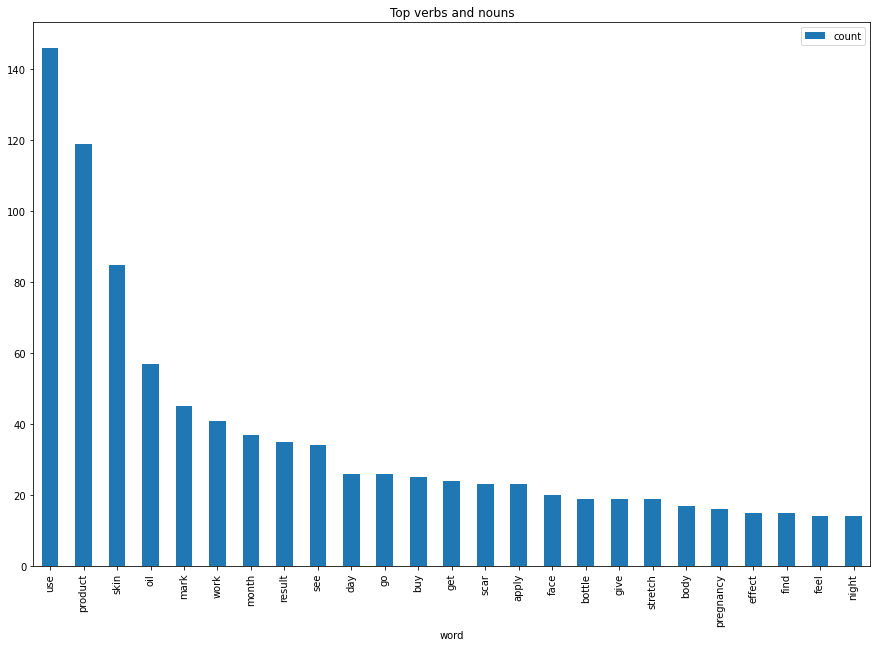

In [42]:
#Visualize
#Barchart for top 25 nouns + verbs
wf_df[0:25].plot.bar(x='word',figsize=(15,10), title='Top verbs and nouns')

# SENTIMENT ANALYSIS

In [43]:
afinn = pd.read_csv(r"C:\Users\ABC\Downloads\Afinn.csv", sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [44]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(text)
sentences

['Beware of fake product guys, i have posted the pic of both fake and genuine bio oil.',
 'The light orange colour one is the original and the light pink colour bottle is the fake one.',
 'This is a sensitive product which we use for our skin so be sure that the product you are using is original and beneficial.',
 'Good product for body.',
 "Scent is excellent but don't use if you have combination skin because it will start giving whiteheads/white pimples.",
 "Happy to buy I use it as a face and body oil but didn't see any results Ok Good Very good product Nice product Like good product It worked perfectly for continuous 7-8 days.",
 'My skin absorbed it fully.',
 'But after few days it felt greasy on my skin.',
 "The product is good but I think it's not good for oily skin.",
 'Value foroney Good Nice Good This is good product ..I like it 🥰🥰 Nice product Nice I love it I used for 4 months but not good and no effect About delivery -\nThe product was delivered before time to me and also 

In [45]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"Beware of fake product guys, i have posted the..."
1,The light orange colour one is the original an...
2,This is a sensitive product which we use for o...
3,Good product for body.
4,Scent is excellent but don't use if you have c...
...,...
391,Very I good product.
392,Di t know if it works because I I have only us...
393,Nice I used this product for my skin care .
394,And thankyou so much it's awesome and I am com...


In [46]:
# making dictionary of afinn
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [47]:
nlp=spacy.load('en_core_web_sm')
# puting new variable as sentiment_lexicon
sentiment_lexicon = affinity_scores

In [48]:
sentiment_lexicon

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [49]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [50]:
calculate_sentiment('fake')

-3

In [51]:
calculate_sentiment('product')

0

In [52]:
calculate_sentiment('good')

3

In [53]:
# sentiment of each sentence
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     -6
1     -3
2      0
3      3
4      3
      ..
391    3
392    0
393    2
394    6
395    0
Name: sentiment_value, Length: 396, dtype: int64

In [54]:
# counting sentiment for each word in each review sentence
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1    18
2    24
3     4
4    18
5    34
6     5
7    10
8    13
9    48
Name: word_count, dtype: int64

In [55]:
sent_df

,sentence,sentiment_value,word_count
0,"Beware of fake product guys, i have posted the...",-6,17
1,The light orange colour one is the original an...,-3,18
2,This is a sensitive product which we use for o...,0,24
3,Good product for body.,3,4
4,Scent is excellent but don't use if you have c...,3,18
...,...,...,...
391,Very I good product.,3,4
392,Di t know if it works because I I have only us...,0,19
393,Nice I used this product for my skin care .,2,10
394,And thankyou so much it's awesome and I am com...,6,14


In [56]:
sentiment = ['positive' if sentiment_value > 0
                          else 'negative' if sentiment_value < 0
                              else 'neutral'
                                  for sentiment_value in sent_df.sentiment_value]


sent_df['sentiments'] = sentiment
sent_df

,sentence,sentiment_value,word_count,sentiments
0,"Beware of fake product guys, i have posted the...",-6,17,negative
1,The light orange colour one is the original an...,-3,18,negative
2,This is a sensitive product which we use for o...,0,24,neutral
3,Good product for body.,3,4,positive
4,Scent is excellent but don't use if you have c...,3,18,positive
...,...,...,...,...
391,Very I good product.,3,4,positive
392,Di t know if it works because I I have only us...,0,19,neutral
393,Nice I used this product for my skin care .,2,10,positive
394,And thankyou so much it's awesome and I am com...,6,14,positive


In [57]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count,sentiments
254,Using this for an year now... Great results ar...,10,86,positive
282,This is really awesome in just day one.. Vill ...,10,28,positive
261,Such an amazing product...used it around the n...,11,72,positive
161,Trust the description Nice product Fantastic p...,11,38,positive
228,Observes skin very easily It has a mild smell ...,12,160,positive
322,Excellent product cheaper than market price Th...,15,38,positive
355,"Good Nice product no doubt, as per yr feel u o...",16,43,positive
9,Value foroney Good Nice Good This is good prod...,16,48,positive
5,Happy to buy I use it as a face and body oil b...,20,34,positive
21,Happy to buy I use it as a face and body oil b...,21,40,positive


In [58]:
# negative sentiment sentence
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count,sentiments
0,"Beware of fake product guys, i have posted the...",-6,17,negative
1,The light orange colour one is the original an...,-3,18,negative
2,This is a sensitive product which we use for o...,0,24,neutral
6,My skin absorbed it fully.,0,5,neutral
7,But after few days it felt greasy on my skin.,0,10,neutral


In [59]:
# posetive sentiment sentence
sent_df[sent_df['sentiment_value']>=5].head()

,sentence,sentiment_value,word_count,sentiments
5,Happy to buy I use it as a face and body oil b...,20,34,positive
8,The product is good but I think it's not good ...,6,13,positive
9,Value foroney Good Nice Good This is good prod...,16,48,positive
11,About product-\nYes its an amazing product.,5,7,positive
21,Happy to buy I use it as a face and body oil b...,21,40,positive


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


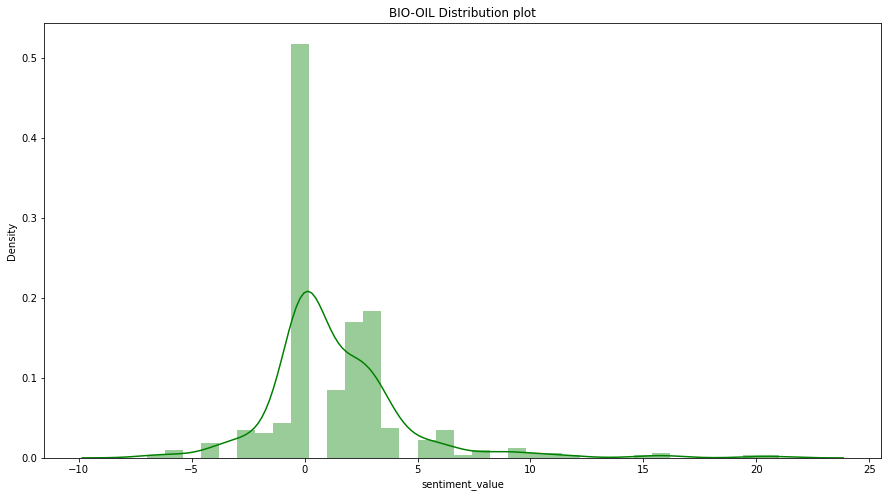

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
sns.distplot(sent_df['sentiment_value'],color='green')
plt.title('BIO-OIL Distribution plot')
plt.show()

# distribution is more on the right side (Right Skewed) it means it is posetively skewed ,WHICH MEANS REVIEWS ARE POSETIVELY SENTIMATED

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

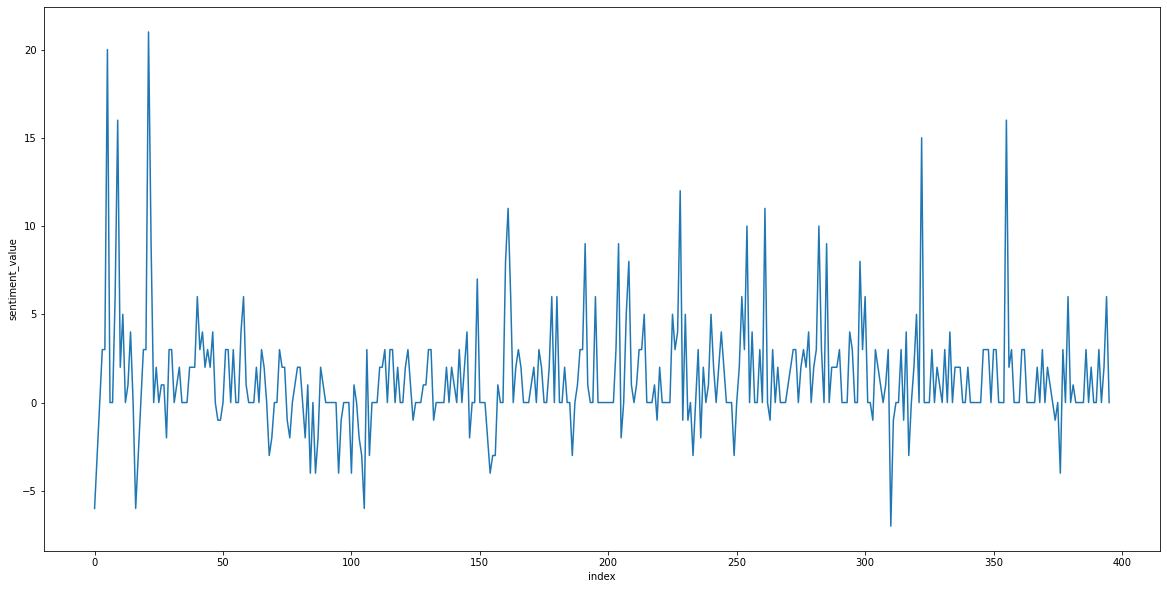

In [61]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df


# Plotting the line plot for sentiment value of whole review

plt.figure(figsize=(20,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)


# from above linplot we can say that most of the review score is on posetive sideor above 0 (sentiment value for the each review of the bio oil  )

In [62]:
Rating=pd.read_csv(r"C:\Users\ABC\Desktop\Desktop\Review on bio-oil natural- rating.csv")
Rating

,NAME,RATING,REVIEW
0,sangeeta,4,"Beware of fake product guys, i have posted the..."
1,Dhimahi M.,4,Good product for body. Scent is excellent but ...
2,Anita Pathak,4,Happy to buy
3,Rishitha Kaja,4,I use it as a face and body oil but didn't see...
4,Vishnu,4,Ok
...,...,...,...
210,Susweta Biswas,5,People used to tell me that my stretch marks a...
211,Amazon Customer,4,The oil does reduce stretch marks to some exte...
212,Saffron,4,Very I good product. Di t know if it works bec...
213,Mandy Bansal,4,Nice


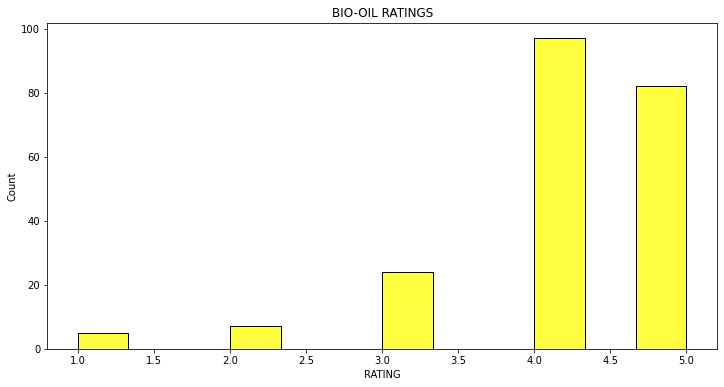

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[12,6])
sns.histplot(Rating,x='RATING',color='yellow')
plt.title('BIO-OIL RATINGS')
plt.show()

In [64]:
Rating['RATING'].value_counts()

4    97
5    82
3    24
2     7
1     5
Name: RATING, dtype: int64

# product is good as per the rating given by the users.

In [65]:
product

['Beware of fake product guys, i have posted the pic of both fake and genuine bio oil. The light orange colour one is the original and the light pink colour bottle is the fake one.\nThis is a sensitive product which we use for our skin so be sure that the product you are using is original and beneficial.',
 "Good product for body. Scent is excellent but don't use if you have combination skin because it will start giving whiteheads/white pimples.",
 'Happy to buy',
 "I use it as a face and body oil but didn't see any results",
 'Ok',
 'Good',
 'Very good product',
 'Nice product',
 'Like',
 'good product',
 "It worked perfectly for continuous 7-8 days. My skin absorbed it fully. But after few days it felt greasy on my skin. The product is good but I think it's not good for oily skin.",
 'Value foroney',
 'Good',
 'Nice',
 'Good',
 'This is good product ..I like it 🥰🥰',
 'Nice product',
 'Nice I love it',
 'I used for 4 months but not good and no effect',
 'About delivery -\nThe product 

In [66]:
string_Total = " ".join(product)

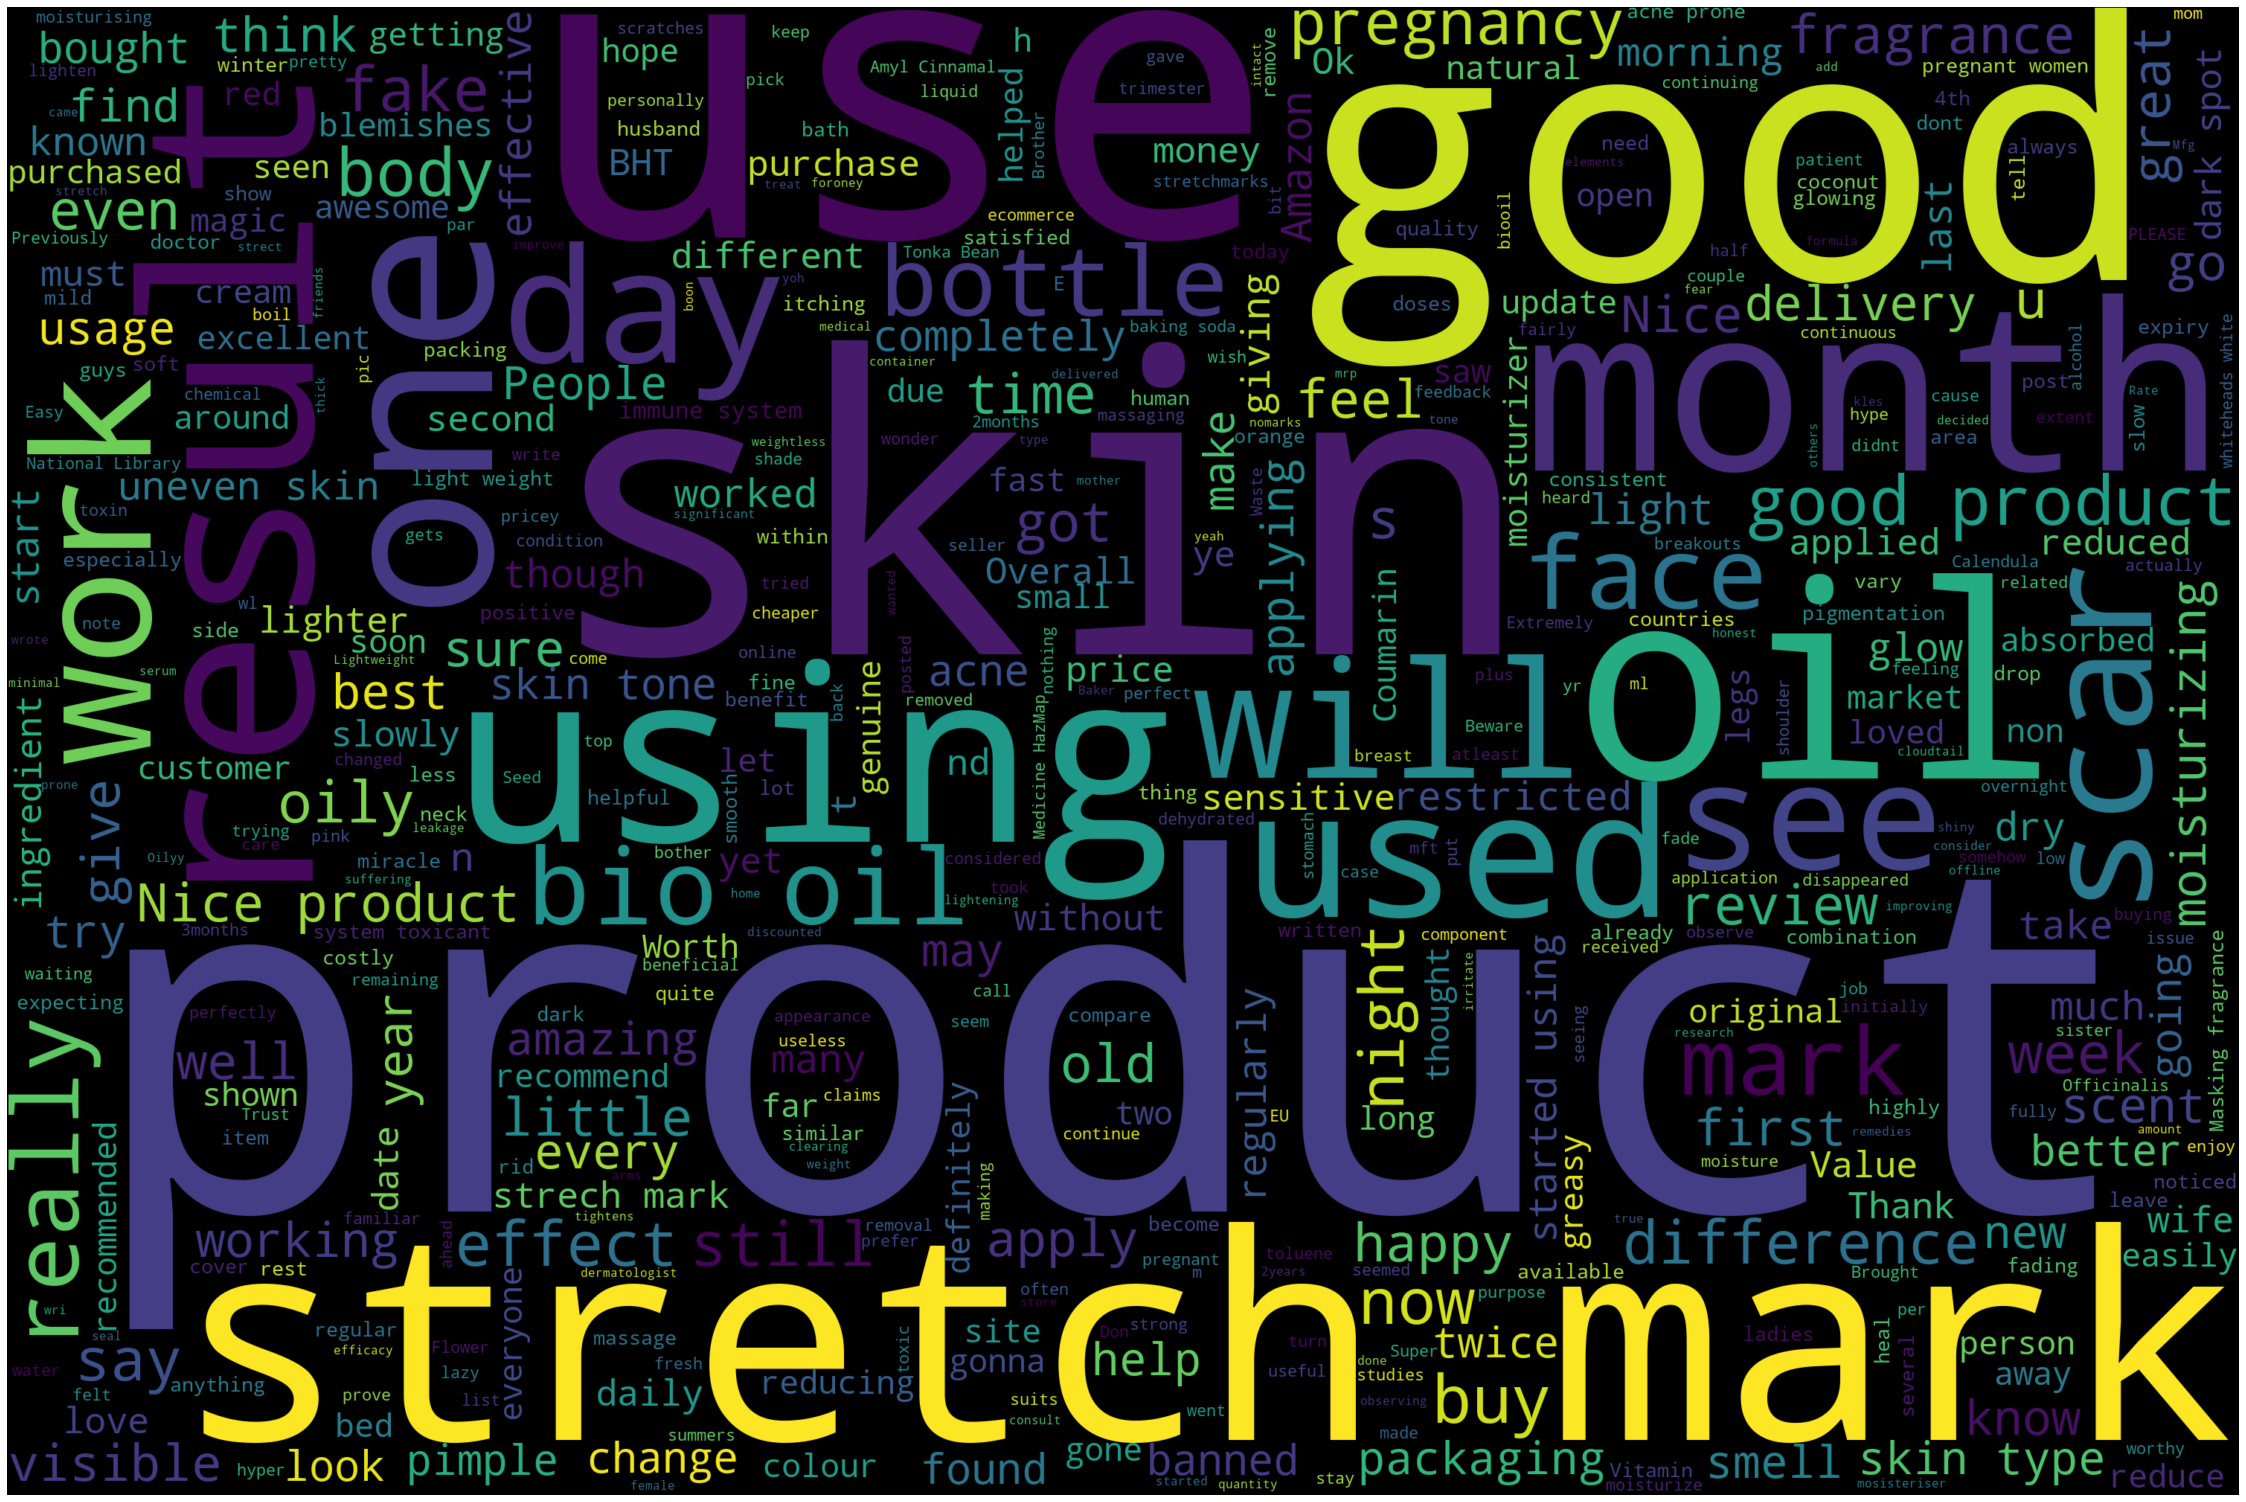

In [67]:
wordcloud=WordCloud(width=3000,height=2000,max_words=500,random_state=21).generate(string_Total)
plt.figure(figsize=(40,30))
plt.axis("off")
plt.imshow(wordcloud,interpolation='bilinear')

# CONCLUSION

we have a data of various reviews given by the users of the product "BIO OIL"on  which we have to do a sentimental analysis. we process the text (reviews) by removing unwanted column also Removed the NAN rows and blank space from the reviews. Then we join all the reviews by(' ')and do some normal steps which are tokenization, remove punctuation and stopwords,normalizing, steming and lematization.Then we convert reviews into dockblock so we can edit the text.Then we tokenize the each word in the reviews by tokenization and tag tokenized words by its part of speech by POS tagging. So that we get all the nouns and verbs from the text.After that By count vectorization we get the number of words which are repeated in text various time. we plot them on barchart according to the highest frequency of word in the reviews. 

for sentinment analysis,

we tokenize the each reviews as a one sentence and then check the sentiment of each sentence to find overall sentimental value of reviews on bio oil product are posetive ,negative or neutral. For that we use one library alled 'AFFINN' which consist of words and their sentiment value which tells us that the word having sentiment on posetive, negative or neutral side.

we pass the each review through if else loop and get the sentiment  and sentiment value of the each tweet by then this value is stored in front of each review in the dataframe. Then we plot the distribution plot and linechart to visualize the score for the all reviews and seen that most of the score are towards posetive side and few of thems are on negative and neutral side. Hence we can say that 'Reviews on bio oil product are with posetive sentiment.